In [1]:
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import pandas as pd
import json
import threading
import time
import datetime
from queue import Queue
import re

In [12]:
# 進去每一篇文章把內容都抓出來的功能
def get_content(url):
    
    try:
        headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36"}
        res = requests.get(url, headers=headers, verify=False)
        soup = BeautifulSoup(res.text, 'html.parser')

        try:
            #如果文章是ithome
            if "ithome" in url:           
                div = [t.text for t in soup.find_all(name='p')]
                return ''.join(div).replace('\n',"").replace('\u3000','')

            #如果文章是techorange
            if "techorange" in url:  
                div = soup.find(name='div', attrs={'class':'fb-quotable'})
                return div.text.replace('\n',"").replace('\u3000','')

            #如果是inside網站 或 bnext
            if "inside" in url or "www.bnext" in url:
                div = soup.find(name='article', attrs={'itemprop':'articleBody'})
                text = [p.text for p in div.find_all(name='p')]
                return ''.join(text).replace('\n',"").replace('\u3000','')

            #如果是風傳媒網站 或 free.com網站
            if "storm" in url or "free.com" in url or "meet.bnext" in url or "ettoday" in url:
                div = soup.find(name='div', attrs={'itemprop':'articleBody'})
                text = [p.text for p in div.find_all(name='p')]
                return ''.join(text).replace('\n',"").replace('\u3000','')

            #如果是smartm網站
            if "smartm" in url:
                div = soup.find(name='div', attrs={'class':'Editor'})
                text = [p.text for p in div.find_all(class_='Paragraph')]
                return ''.join(text).replace('\n',"").replace('\u3000','')

            #如果是電獺少女網站
            if "agirls.aotter" in url:
                div = soup.find(name='div', attrs={"class":"post-content"})
                text = [p.text for p in div.find_all(name="p")]
                return ''.join(text).replace('\n',"").replace('\u3000','')

            if "technews" in url:
                div = soup.find(name='div', attrs={'class':'indent'})
                text = [p.text for p in div.find_all(name="p")]
                return ''.join(text).replace('\n',"").replace('\u3000','')

            if "newmobilelife" in url:
                div = soup.find(name='div', attrs={'class':'wprt-container'})
                text = [p.text for p in div.find_all(name="p")]
                return ''.join(text).replace('\n',"").replace('\u3000','')

            if "tw.news.yahoo.com" in url:
                div = soup.find(name='article', attrs={'itemprop':'articleBody'})
                text = [p.text for p in div.find_all(name="p")]
                return ''.join(text).replace('\n',"").replace('\u3000','')

            if "cool3c" in url:
                div = soup.find(name='article', attrs={'class':'article'})
                text = [p.text for p in div.find_all(name="p")]
                return ''.join(text).replace('\n',"").replace('\u3000','')

            if "managertoday" in url:
                text = [p.text for p in soup.find_all(name="p")]
                return ''.join(text).replace('\n',"").replace('\u3000','')

            if "jiqizhixin.com" in url:
                headers['Cookie'] = 'ahoy_visitor=3cba31bd-196d-4459-a5ef-90db5770a9e6; ahoy_visit=4e08ffb9-ef35-4d31-ba27-aa8c1b6a09ef; _Synced_session=dRbMdxXHs9acoqgJ2z9EH%2FvQ7btGUDyC8rOAuoKACVB3FBQYd%2FtBPRjrEZ6YUzR3Z4rd97BmCQpI9EBdag3pKJkq94I%2F7HfF3KR7zcZvoVJXtE7ayiLBji9l1N0gbYwzw%2B450cuI8E6utZHmsPeoVL8I4hceUDG9148R8Ewi6TXHGW6QjBUrn%2BaOZk%2FR3ir217SqWCUHn4T628HrJtIUOebQdlb1F1fgUZWwhA98%2FM8p6U1gAikGYoCviQ0U%2BqBaKPTSqhBkWjB5YrYsvFbMfihRWg4CH47DRmFC81ETO31p7F4KB1DG6cx4SiDq5sPfOTXxPEkCFzkrPV%2FXXcqUm%2F6j03Fz%2Fz3LRJx%2F4KD8K0DnOTL%2BLcCy0kZiAWosmPJS2ar9rgwDSFrboKpjrN%2FhXls%3D--mUAo1mrpe8efm2pW--Z%2BZ1iIJrt4QWVmfhFz5V8A%3D%3D; _ga=GA1.2.1062124577.1582279686; _gid=GA1.2.787119955.1582279686'
                div = soup.find(name='div', attrs={'class':'article__content'})
                text = [p.text for p in div.find_all(name="p")]
                return ''.join(text).replace('\n',"").replace('\u3000','')

        except:
            print('you are access the exception.')
            return None
    except:
        print('link went wrong.')
        return None

In [ ]:
url = "https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNewsByBucketGroup&groupid=tech_tw&len=1000"
res = requests.get(url)
if res.status_code != 200:
    print('網址無效：',url)
content = res.json()
print(type(content),len(content['items']))
    
article = list()
for i,con in enumerate(content['items']):
    temp = dict()
    temp['Id'] = i+1
    temp['Title'] = con.get('title')
    temp['Description'] = con.get('description')
    temp['Link'] = con.get('linkurl')
    temp['Time'] = con.get('publishtime')
    
    #api資料內的時間是毫秒時戳，轉換成看得懂的格式
    if temp['Time']:
        dt = datetime.datetime.fromtimestamp(con.get('publishtime')/1000)
        dt = dt.isoformat(sep=' ', timespec='milliseconds')
        temp['Time'] = dt
        
    # 把抓到的單筆資料新增到article list
    article.append(temp)

In [ ]:
result = list()

stime = time.time()
count = 0

for link in article:
    temp = dict()
    
    # 如果有link,就抓內容，沒有就繼續下一個
    if link['Link']:
        print('正在解析..',link['Id'],link['Link'])
        content = get_content(link['Link'])  
    else:
        continue
        
    # 如果有抓到內容就存到result裡
    if content:
        temp['Title'] = link['Title']
        temp['content'] = content
        result.append(temp)
        count += 1
    
    if count == 500:
        break

etime = time.time()

print('共找到 %d 筆' %len(result))
print('花時', etime-stime)

以上可以執行，但非常久。

以下是簡單測試版，也OK。

In [ ]:
from queue import Queue


# 子執行緒的工作函數
def job(num, url,q):
    print("Thread", num)
    time.sleep(3)
    print('Thread got', url)
    q.put('num:{} url{} output'.format(num,url))

article = [
    {'Link': 'http://1google.com.tw'},
    {'Link': 'http://2yahoo.com.tw'},
    {'Link': 'http://3bing.com.tw'},
    {'Link': 'http://4yahoo.com.tw'},
    {'Link': 'http://5bing.com.tw'},
    {'Link': 'http://6yahoo.com.tw'},
    {'Link': 'http://7bing.com.tw'},
    {'Link': 'http://8yahoo.com.tw'},
    {'Link': 'http://9bing.com.tw'}
]

Q = Queue()

# 建立 5 個子執行緒
threads = []
for i, link in enumerate(article):
    threads.append(threading.Thread(target = job, args = (i, link['Link'],Q)))
    threads[i].start()

# 主執行緒繼續執行自己的工作
# ...

# 等待所有子執行緒結束
for thread in threads:
    thread.join()

result = []
for _ in range(9):
    result.append(Q.get())

print(result)
print("Done.")

根據上面的簡單測試，改寫成正式版：

In [2]:
# 進去每一篇文章把內容都抓出來的功能
def get_content(num,url,q):
    print('Thread..',num)
    
    try:
        headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36"}
        res = requests.get(url, headers=headers, verify=False)
        soup = BeautifulSoup(res.text, 'html.parser')

        try:
            #如果文章是ithome
            if "ithome" in url:           
                div = [t.text for t in soup.find_all(name='p')]
                q.put(''.join(div).replace('\n',"").replace('\u3000',''))

            #如果文章是techorange
            if "techorange" in url:  
                div = soup.find(name='div', attrs={'class':'fb-quotable'})
                q.put(div.text.replace('\n',"").replace('\u3000',''))

            #如果是inside網站 或 bnext
            if "inside" in url or "www.bnext" in url:
                div = soup.find(name='article', attrs={'itemprop':'articleBody'})
                text = [p.text for p in div.find_all(name='p')]
                q.put(''.join(text).replace('\n',"").replace('\u3000',''))

            #如果是風傳媒網站 或 free.com網站
            if "storm" in url or "free.com" in url or "meet.bnext" in url or "ettoday" in url:
                div = soup.find(name='div', attrs={'itemprop':'articleBody'})
                text = [p.text for p in div.find_all(name='p')]
                q.put(''.join(text).replace('\n',"").replace('\u3000',''))

            #如果是smartm網站
            if "smartm" in url:
                div = soup.find(name='div', attrs={'class':'Editor'})
                text = [p.text for p in div.find_all(class_='Paragraph')]
                q.put(''.join(text).replace('\n',"").replace('\u3000',''))

            #如果是電獺少女網站
            if "agirls.aotter" in url:
                div = soup.find(name='div', attrs={"class":"post-content"})
                text = [p.text for p in div.find_all(name="p")]
                q.put(''.join(text).replace('\n',"").replace('\u3000',''))

            if "technews" in url:
                div = soup.find(name='div', attrs={'class':'indent'})
                text = [p.text for p in div.find_all(name="p")]
                q.put(''.join(text).replace('\n',"").replace('\u3000',''))

            if "newmobilelife" in url:
                div = soup.find(name='div', attrs={'class':'wprt-container'})
                text = [p.text for p in div.find_all(name="p")]
                q.put(''.join(text).replace('\n',"").replace('\u3000',''))

            if "tw.news.yahoo.com" in url:
                div = soup.find(name='article', attrs={'itemprop':'articleBody'})
                text = [p.text for p in div.find_all(name="p")]
                q.put(''.join(text).replace('\n',"").replace('\u3000',''))

            if "cool3c" in url:
                div = soup.find(name='article', attrs={'class':'article'})
                text = [p.text for p in div.find_all(name="p")]
                q.put(''.join(text).replace('\n',"").replace('\u3000',''))

            if "managertoday" in url:
                text = [p.text for p in soup.find_all(name="p")]
                q.put(''.join(text).replace('\n',"").replace('\u3000',''))

            if "jiqizhixin.com" in url:
                headers['Cookie'] = 'ahoy_visitor=3cba31bd-196d-4459-a5ef-90db5770a9e6; ahoy_visit=4e08ffb9-ef35-4d31-ba27-aa8c1b6a09ef; _Synced_session=dRbMdxXHs9acoqgJ2z9EH%2FvQ7btGUDyC8rOAuoKACVB3FBQYd%2FtBPRjrEZ6YUzR3Z4rd97BmCQpI9EBdag3pKJkq94I%2F7HfF3KR7zcZvoVJXtE7ayiLBji9l1N0gbYwzw%2B450cuI8E6utZHmsPeoVL8I4hceUDG9148R8Ewi6TXHGW6QjBUrn%2BaOZk%2FR3ir217SqWCUHn4T628HrJtIUOebQdlb1F1fgUZWwhA98%2FM8p6U1gAikGYoCviQ0U%2BqBaKPTSqhBkWjB5YrYsvFbMfihRWg4CH47DRmFC81ETO31p7F4KB1DG6cx4SiDq5sPfOTXxPEkCFzkrPV%2FXXcqUm%2F6j03Fz%2Fz3LRJx%2F4KD8K0DnOTL%2BLcCy0kZiAWosmPJS2ar9rgwDSFrboKpjrN%2FhXls%3D--mUAo1mrpe8efm2pW--Z%2BZ1iIJrt4QWVmfhFz5V8A%3D%3D; _ga=GA1.2.1062124577.1582279686; _gid=GA1.2.787119955.1582279686'
                div = soup.find(name='div', attrs={'class':'article__content'})
                text = [p.text for p in div.find_all(name="p")]
                q.put(''.join(text).replace('\n',"").replace('\u3000',''))

        except:
            print('you are access the exception.')
            return
    except:
        print('link went wrong.')
        return

In [3]:
url = "https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNewsByBucketGroup&groupid=tech_tw&len=1000"
res = requests.get(url)
if res.status_code != 200:
    print('網址無效：',url)
content = res.json()
print(type(content),len(content['items']))
    
article = list()
for i,con in enumerate(content['items']):
    temp = dict()
    temp['Id'] = i+1
    temp['Title'] = con.get('title')
    temp['Description'] = con.get('description')
    temp['Link'] = con.get('linkurl')
    temp['Time'] = con.get('publishtime')
    
    #api資料內的時間是毫秒時戳，轉換成看得懂的格式
    if temp['Time']:
        dt = datetime.datetime.fromtimestamp(con.get('publishtime')/1000)
        dt = dt.isoformat(sep=' ', timespec='milliseconds')
        temp['Time'] = dt
        
    # 把抓到的單筆資料新增到article list
    article.append(temp)



<class 'dict'> 1000


In [4]:
df = pd.DataFrame(article)
df.set_index('Id', inplace=True)
df.head()

,Description,Link,Time,Title
Id,,,,
1,作弊也是青春的一部分啊！（大誤）,https://agirls.aotter.net/post/56889?utm_sourc...,2020-02-24 07:36:28.000,作弊偵測器！日本研發 AI 智能來監考，判斷頭手動作還有視線傾斜數據就能抓作弊！ - 電獺少女
2,卡巴斯基即將以 Kaspersky Security Cloud Free 取代 Kaspe...,https://free.com.tw/kaspersky-security-cloud-f...,2020-02-23 18:00:33.000,卡巴斯基 Security Cloud Free 取代 Antivirus Free 免費防...
3,這段期間我試用了幾個口罩地圖服務，發現 Yahoo 有針對口罩推出「口罩去哪買？」線上查詢服...,https://free.com.tw/yahoo-2019-ncov-mask/?utm_...,2020-02-23 10:24:49.000,口罩去哪買？Yahoo 口罩地圖顯示距離最近、還買得到口罩的藥局資訊
4,WordPress Security Scanner 是一個免費的 WordPress 安全...,https://free.com.tw/wordpress-security-scanner...,2020-02-23 22:00:18.000,WordPress Security Scanner 掃描你的網站是否有已知弱點
5,2 月 22 日三星電子確認，在南韓東南部龜尾市的智慧型手機製造工廠確認一例武漢肺炎（COV...,https://technews.tw/2020/02/22/samsung-electro...,2020-02-23 09:23:28.000,三星南韓工廠確認武漢肺炎病例，手機生產緊急叫停 | TechNews 科技新報


透過regex把網址host抓出來畫圓餅圖和長條圖

In [21]:
df['Domain'] = df['Link'].str.extract(pat = 'https?://([^\/]+)')

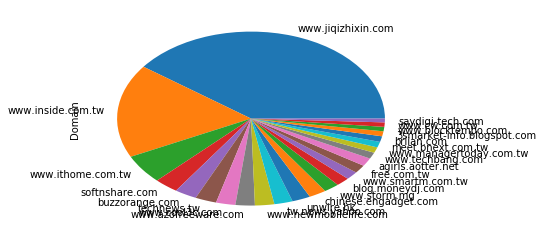

In [38]:
# 計算數量並畫成圓餅圖和長條圖
df['Domain'].value_counts().head(25).plot.pie()

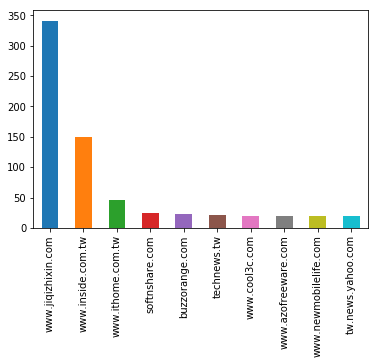

In [40]:
df['Domain'].value_counts().head(10).plot.bar()

In [41]:
stime = time.time()

Q = Queue()

# 建立 5 個子執行緒
threads = []

count = 0
for i, link in enumerate(article):
    temp = dict()
    
    # 如果有link,就抓內容，沒有就繼續下一個
    if link['Link']:
        threads.append(threading.Thread(target = get_content, args = (i, link['Link'],Q)))
        threads[i].start()
        print('正在解析..',link['Id'],link['Link']) 
    else:
        continue
    
    if Q.qsize() == 500:
        break


# 等待所有子執行緒結束
for thread in threads:
    thread.join()

result = []
for r in range(500):
    result.append(Q.get())

etime = time.time()

print('共找到 %d 筆' %len(result))
print('花時', etime-stime)

Thread.. 0
正在解析.. 1 https://agirls.aotter.net/post/56889?utm_source=facebook.com&utm_medium=aottergirls&utm_campaign=link
Thread.. 1
正在解析.. 2 https://free.com.tw/kaspersky-security-cloud-free/?utm_content=buffer1fc11&utm_medium=social&utm_source=facebook.com&utm_campaign=buffer
Thread..正在解析.. 2
 3 https://free.com.tw/yahoo-2019-ncov-mask/?utm_content=buffer72cd1&utm_medium=social&utm_source=facebook.com&utm_campaign=buffer
Thread.. 3
正在解析.. 4 https://free.com.tw/wordpress-security-scanner/?utm_content=buffercc69f&utm_medium=social&utm_source=facebook.com&utm_campaign=buffer
Thread.. 4
正在解析.. 5 https://technews.tw/2020/02/22/samsung-electronics-confirms-coronavirus-case-at-phone-factory-complex-in-south-korea/?utm_source=fb_tn&utm_medium=facebook
Thread.. 5
正在解析.. 6 https://www.newmobilelife.com/2020/02/24/google-service-ban-huawei-device/
Thread..正在解析..  7 https://www.newmobilelife.com/2020/02/23/cemu-the-legend-of-zelda/?utm_content=buffer1d364&utm_medium=social&utm_source=facebook.co

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

正在解析.. 91 https://tw.news.yahoo.com/%E8%80%B3%E6%A9%9F%E9%82%84%E6%9C%89%E7%B7%9A%E6%98%AF%E5%9C%A8%E5%93%88%E5%9B%89-2020-%E7%9C%9F%E7%84%A1%E7%B7%9A%E8%97%8D%E7%89%99%E8%80%B3%E6%A9%9F%E9%80%99%E5%B9%BE%E6%AC%BE%E8%B6%85%E4%BA%BA%E6%B0%A3-101357546.html
Thread.. 91
正在解析.. 92 https://www.newmobilelife.com/2020/02/23/pci-e-6-0-coming-soon/
Thread.. 92
正在解析.. 93 https://ahui3c.com/49939/lg-g8s-thinq
Thread.. 93
正在解析.. 94 https://www.storm.mg/lifestyle/2317677
Thread.. 94
正在解析.. 95 https://www.storm.mg/lifestyle/2317648
Thread.. 95
正在解析.. 96 https://www.smartm.com.tw/article/36323936cea3
Thread.. 96
正在解析.. 97 https://www.smartm.com.tw/article/36323935cea3
Thread.. 97
正在解析.. 98 https://www.smartm.com.tw/Article/36323936cea3
Thread..正在解析.. 98
 99 https://www.smartm.com.tw/Article/36323935cea3
Thread.. 99
正在解析.. 100 https://chinese.engadget.com/chinese-2020-02-21-google-cracking-down-apps-disruptive-ads.html
Thread.. 100
正在解析.. 101 https://chinese.engadget.com/chinese-2020-02-21-microsoft-d

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


 164 http://my-hiend.com/wp/%e7%b5%95%e5%b0%8d%e4%b8%8d%e6%98%af%e7%a5%9e%e8%a9%b1%ef%bc%8c%e6%98%8e%e9%a1%af%e6%9c%89%e6%95%88-ds-audio-ion-001%e9%9b%a2%e5%ad%90%e7%94%a2%e7%94%9f%e5%99%a8/
Thread.. 164
正在解析.. 165 https://ez3c.tw/8050
Thread.. 165
正在解析.. 166 https://blog.moneydj.com/news/2020/02/21/%e9%a8%b0%e8%a8%8a%e5%b8%82%e5%80%bc%e7%a0%b45%e5%8d%83%e5%84%84%e7%be%8e%e5%85%83%ef%bc%81%e9%99%b8%e6%82%b6%e7%b6%93%e6%bf%9f%e5%a4%af-app%e4%b8%8b%e8%bc%89%e5%89%b5%e7%a9%ba%e5%89%8d%e9%ab%98/amp/
Thread.. 正在解析..166
 167 https://blog.moneydj.com/news/2020/02/21/%e5%a4%a7%e6%91%a9%e9%87%8d%e9%87%91%e8%bf%8e%e5%a8%b6etrade%ef%bc%81%e8%8f%af%e7%88%be%e8%a1%97%e7%ad%96%e7%95%a5%e6%94%b9%e8%ae%8a%e3%80%81%e6%95%a3%e6%88%b6%e7%8d%b2%e9%87%8d%e8%a6%96/amp/
Thread.. 167
正在解析.. 168 https://kai3c.pros.si/SamsungA71
Thread.. 168
正在解析.. 169 https://www.blocktempo.com/stealing-all-of-makers-collateral/
Thread.. 169
正在解析.. 170 https://bookzone.cwgv.com.tw/topic/details/17237?utm_source=Facebook&utm_me

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Thread..正在解析.. 204
 205 https://www.shoppingdesign.com.tw/post/view/5117?utm_source=facebook_sd
Thread.. 正在解析..205 
206 https://www.shoppingdesign.com.tw/post/view/5117
Thread.. 206
正在解析.. 207 https://softnshare.com/data-science-at-scale/
Thread.. 207
正在解析.. 208 https://softnshare.com/arduino-deep-learning-from-ground-uptm/
Thread..正在解析.. 208
 209 https://www.techbang.com/posts/76059-fake-images-are-in-the-dying-google-has-come-up-with-a-fake-image-tool?from=home_news
Thread..正在解析.. 209
 210 https://www.wealth.com.tw/home/articles/24153?utm_source=facebook.com&utm_medium=fanpage
Thread.. 210
正在解析.. 211 https://changepw.com/?p=109483
Thread.. 211
正在解析.. 212 https://softnshare.com/raspberry-pi-deep-learning-from-ground-uptm/
Thread.. 212
正在解析.. 213 https://softnshare.com/artificial-intelligence-reinforcement-learning-in-python/
Thread.. 213
正在解析.. 214 https://buzzorange.com/techorange/2020/02/07/junyiacademy-taipei-cooc-edu/
Thread.. 正在解析.. 214215
 https://news.knowing.asia/news/2839fbf7

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

Thread.. 276
正在解析.. 277 https://news.knowing.asia/news/8d5122aa-2f7e-4579-8e93-e48785e429e6
Thread.. 277
正在解析.. 278 https://softnshare.com/bayesian-machine-learning-in-python-ab-testing/
Thread..正在解析.. 278
 279 http://3smarket-info.blogspot.com/2020/01/40.html
Thread.. 279
正在解析.. 280 https://www.kocpc.com.tw/archives/302009
Thread.. 280
正在解析.. 281 https://pick.mydesy.com/archives/155042
Thread..正在解析.. 281
 282 https://buy.biji.co/?q=shop&act=single&select_biji=running&cate=all&prod_id=160&utm_source=Facebook&utm_medium=Post&utm_content=[%E3%80%90AI+DesignLife%E3%80%91%E6%A6%AE%E8%80%80%E5%85%B8%E8%97%8F+%E5%8D%81%E4%BA%8C%E6%A0%BC%E7%8D%8E%E7%89%8C%E6%94%B6%E7%B4%8D%E7%9B%92]&utm_campaign=[20200114%E9%81%8B%E7%AD%86]%09
Thread..正在解析.. 282
 283 https://buzzorange.com/techorange/2020/01/14/chatbot-systalk-ai/
Thread.. 283
正在解析.. 284 https://softnshare.com/chatbot/
Thread.. 284
正在解析.. 285 https://matcha-jp.com/tw/8563?utm_source=social&utm_medium=facebook&utm_campaign=tw&utm_content=20200

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

 297 https://buzzorange.com/techorange/2020/01/10/lulupet-ai-cat-litter-box/
Thread.. 297
you are access the exception.正在解析..
 298 https://www.cw.com.tw/article/article.action?id=5098521&utm_source=fb_cw&utm_medium=social&utm_campaign=fb_cw-social-daily-200110
Thread..正在解析.. 298
you are access the exception.
 299 https://softnshare.com/開源報報-039-人工智慧可怕在於它會替換掉重複的工/
Thread.. 299
正在解析.. 300 https://softnshare.com/%e9%96%8b%e6%ba%90%e5%a0%b1%e5%a0%b1-039-%e4%ba%ba%e5%b7%a5%e6%99%ba%e6%85%a7%e5%8f%af%e6%80%95%e5%9c%a8%e6%96%bc%e5%ae%83%e6%9c%83%e6%9b%bf%e6%8f%9b%e6%8e%89%e9%87%8d%e8%a4%87%e7%9a%84%e5%b7%a5/
Thread.. 300
正在解析.. 301 https://www.wealth.com.tw/home/articles/23802?utm_source=facebook.com&utm_medium=fanpage
Thread.. 301
正在解析.. 302 https://www.parenting.com.tw/article/5080935-/?utm_source=CW.FB&utm_medium=social&utm_campaign=cp-f11-media-5080935-200110
Thread.. 302
正在解析.. 303 https://unwire.hk/2020/01/10/samsung-c-lab-selfietype/mobile-phone/
you are access the exception.
Thread.. 

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

正在解析.. 323 https://www.storm.mg/article/2312230
Thread.. 323
正在解析.. 324 https://www.jiqizhixin.com/articles/2020-02-06
Thread.. 324
正在解析.. 325 https://www.jiqizhixin.com/articles/2020-01-27-3
Thread.. 325
正在解析.. 326 https://www.jiqizhixin.com/articles/2020-01-09-12
Thread.. 326正在解析.. 
327 https://www.jiqizhixin.com/articles/2020-01-31-2
Thread.. 327
正在解析.. 328 https://www.jiqizhixin.com/articles/2020-01-27-4
Thread.. 328
正在解析.. 329 https://www.ithome.com.tw/review/134119
Thread.. 329
正在解析.. 330 https://www.ithome.com.tw/news/135958
Thread.. 330
正在解析.. 331 https://www.managertoday.com.tw/eightylife/article/view/170
Thread..正在解析.. 331
 332 https://www.inside.com.tw/article/18985-taiwan-biotech-team-fights-2019ncov
Thread.. 正在解析.. 333 https://www.ithome.com.tw/news/135946
332
Thread.. 333
正在解析.. 334 https://www.jiqizhixin.com/articles/2020-02-21-12
Thread..正在解析.. 335 https://www.jiqizhixin.com/articles/2020-02-21-11
 334
Thread.. 335
正在解析.. 336 https://www.jiqizhixin.com/articles/2020-02-

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

Thread.. 339
正在解析.. 340 https://www.jiqizhixin.com/articles/2020-02-21-8
Thread.. 340
正在解析.. 341 https://www.jiqizhixin.com/articles/2020-02-21-7
Thread.. 341
正在解析.. 342 https://www.jiqizhixin.com/articles/2020-02-21-2
Thread.. 342
正在解析.. 343 https://www.jiqizhixin.com/articles/2020-02-21
Thread.. 343
正在解析.. 344 https://www.jiqizhixin.com/articles/2020-02-21-6
Thread.. 344
正在解析.. 345 https://www.jiqizhixin.com/articles/2020-02-21-4
Thread.. 345
正在解析.. 346 https://www.jiqizhixin.com/articles/2020-02-20-9
Thread.. 正在解析..346 
347 https://www.inside.com.tw/article/18977-big-data-found-coronavirus-source-of-infection
Thread.. 347
正在解析.. 348 https://www.inside.com.tw/article/18973-Hisaishi-Joe-albums-launch-apple-music
Thread.. 348
正在解析.. 349 https://www.ithome.com.tw/news/135927
Thread.. 349
正在解析.. 350 https://www.ithome.com.tw/news/135926
Thread.. 350
正在解析.. 351 https://www.inside.com.tw/article/18975-french-startup-proposes-battery-trailers-as-ad-hoc-ev-range-extenders
Thread.. 351
正在解析..

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

 369 https://www.jiqizhixin.com/articles/2020-02-20-4
Thread..正在解析..  369
370 https://www.inside.com.tw/article/18965-IRS-sues-Facebook-for-9B
Thread.. 370
正在解析.. 371 https://www.jiqizhixin.com/articles/2020-02-20-3
Thread.. 371
正在解析.. 372 https://www.jiqizhixin.com/articles/2020-02-20-2
Thread.. 372
正在解析.. 373 https://www.jiqizhixin.com/articles/2020-02-20
Thread.. 373
正在解析.. 374 https://www.ithome.com.tw/news/135862
Thread.. 374
正在解析.. 375 https://www.ithome.com.tw/news/135860
Thread.. 375
正在解析.. 376 https://www.ithome.com.tw/news/135915
Thread..正在解析.. 376 
377 https://www.inside.com.tw/article/18966-android-11-developer-preview-launch-Pixel
Thread.. 377
正在解析.. 378 https://technews.tw/2020/02/19/youtube-tv-to-cancel-apple-in-app-subscription-in-march/?utm_source=fb_tn&utm_medium=facebook
Thread.. 378
正在解析.. 379 https://www.inside.com.tw/article/18938-growing-old-in-sweden
Thread.. 379正在解析.. 380 https://www.inside.com.tw/article/18964-Taiwan-mask-digital

Thread..正在解析.. 380
 381 https

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

382 https://www.ithome.com.tw/news/135912
Thread.. 382
正在解析.. 383 

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.


D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

you are access the exception.


D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

https://www.ithome.com.tw/news/135903
Thread.. 383
正在解析.. 384 https://technews.tw/2020/02/19/graphene-supercapacitor/?utm_source=fb_tn&utm_medium=facebook
Thread.. 384
正在解析.. 385 https://www.inside.com.tw/article/18963-lendingclub-buys-radius-bank-in-first-fintech-takeover-of-a-bank
Thread..正在解析.. 385
 386 https://www.inside.com.tw/article/18962-super-8-martech
Thread..正在解析.. 386
 387 https://www.managertoday.com.tw/articles/view/59113
Thread.. 387
正在解析.. 388 https://www.inside.com.tw/article/18960-google-chrome-copy-password
Thread..正在解析.. 388
 389 https://www.jiqizhixin.com/articles/2020-02-19-10
Thread..正在解析.. 389
 390 https://www.jiqizhixin.com/articles/2020-02-19-9
Thread..正在解析.. 390
 391 https://www.jiqizhixin.com/articles/2020-02-19-8
Thread.. 391
正在解析.. 392 https://www.jiqizhixin.com/articles/2020-02-19-7
Thread..正在解析.. 392
 393 https://www.ithome.com.tw/news/135892
Thread..正在解析..  394 https://www.jiqizhixin.com/articles/2020-02-19-6
393
Thread.. 394
正在解析.. 395 https://www.jiqi

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

 437 https://www.jiqizhixin.com/articles/2020-02-17-12
Thread..正在解析.. 437
 438 https://www.jiqizhixin.com/articles/2020-02-17-11
Thread.. 438
正在解析.. 439 https://www.jiqizhixin.com/articles/2020-02-17-10
Thread..正在解析.. 439
 440 https://www.jiqizhixin.com/articles/2020-02-17-9
Thread..正在解析.. 440
 441 https://www.jiqizhixin.com/articles/2020-02-17-8
Thread..正在解析.. 441
 442 https://www.jiqizhixin.com/articles/2020-02-17-7
Thread..正在解析.. 442
 443 https://www.jiqizhixin.com/articles/2020-02-17-6
Thread.. 443
正在解析.. 444 https://www.jiqizhixin.com/articles/2020-02-17-5
Thread.. 444
正在解析.. 445 https://www.jiqizhixin.com/articles/2020-02-17-4
Thread.. 445
正在解析.. 446 https://www.jiqizhixin.com/articles/2020-02-17-3
Thread.. 446
正在解析.. 447 https://technews.tw/2020/02/17/new-13-inch-macbook-pro-exposed/?utm_source=fb_tn&utm_medium=facebook
Thread.. 正在解析.. 448 https://technews.tw/2020/02/17/medigenvac-nih-wuhan-pneumonia-vaccine/?utm_source=fb_tn&utm_medium=facebook
447
Thread.. 448
正在解析.. 449 https

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

Thread.. 461
正在解析.. 462 https://www.inside.com.tw/article/18916-google-Area-120-gamesnacks-brings-quick-casual-games-any-device
Thread.. 462
正在解析.. 463 https://www.jiqizhixin.com/articles/2020-02-15-4
Thread..正在解析.. 463
 464 https://www.jiqizhixin.com/articles/2020-02-15-3
Thread..正在解析.. 464
 465 https://www.jiqizhixin.com/articles/2020-02-15-2
Thread.. 465
正在解析.. 466 https://www.jiqizhixin.com/articles/2020-02-15
Thread.. 466
正在解析.. 467 https://www.inside.com.tw/article/18915-Apple-might-use-its-own-5G-antenna-in-its-2020-iPhones
Thread..正在解析.. 467
 468 https://www.inside.com.tw/article/18914-Audrey-Tang-said-that-many-countries-are-interested-in-Taiwan-open-government-as-a-mask-online-platform
Thread..正在解析.. 468
 469 https://www.ithome.com.tw/news/135841
Thread.. 469
正在解析.. 470 https://www.inside.com.tw/article/18913-coronavirus-confirmed-patients-questioned-in-china
Thread..正在解析.. 470
 471 https://www.inside.com.tw/article/18911-Trump-considering-tax-incentive-for-more-americans-to-

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

517 https://www.inside.com.tw/article/18874-who-named-wuhan-coronavirus-covid19
Thread.. 517
正在解析.. 518 https://www.jiqizhixin.com/articles/2020-02-12
Thread.. 518
正在解析.. 519 https://www.inside.com.tw/article/18873-Audrey-Tang-attend-CSIS
Thread.. 519
正在解析.. 520 https://www.inside.com.tw/article/18872-elon-musk-delete-facebook
Thread.. 520
正在解析.. 521 https://www.inside.com.tw/article/18869-Permanent-Record-by-Edward-Snowden
Thread.. 521
正在解析.. 522 https://www.inside.com.tw/article/18871-e-scooter-sales-decline-in-2020-jan
Thread.. 522
正在解析.. 523 https://www.inside.com.tw/article/18870-spacexs-first-astronaut-mission-could-take-off-in-may
Thread.. 523
正在解析.. 524 https://www.inside.com.tw/article/18868-ibm-slack-chat-employee-rollout-microsoft-teams-competition
Thread..正在解析.. 525 https://www.jiqizhixin.com/articles/2020-02-11-11
 Thread.. 525
正在解析.. 526 https://www.jiqizhixin.com/articles/2020-02-11-10
524
Thread.. 526
正在解析.. 527 https://www.jiqizhixin.com/articles/2020-02-11-9
Thread.. 

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

Thread..正在解析.. 571
 572 https://www.inside.com.tw/article/18841-3-Tips-for-Resume-Writing-that-will-get-you-an-Interview
Thread..正在解析.. 572
 573 https://www.inside.com.tw/article/18846-2019-nCov-vaccine-taiwan
Thread.. 正在解析.. 574 https://www.ithome.com.tw/news/135710
573
Thread.. 正在解析..574
 575 https://www.inside.com.tw/article/18845-Wuhan-2019-nCoV-automobile-industry-supply-chain
Thread..正在解析.. 576 https://www.jiqizhixin.com/articles/2020-02-07-13
 575
Thread..正在解析.. 576
 577 https://www.inside.com.tw/article/18842-starlink-might-get-ipo
Thread.. 577
正在解析.. 578 https://www.jiqizhixin.com/articles/2020-02-07-12
Thread.. 578
正在解析.. 579 https://www.jiqizhixin.com/articles/2020-02-07-11
Thread.. 579
正在解析.. 580 https://www.jiqizhixin.com/articles/2020-02-07-10
Thread..正在解析.. 580
 581 https://www.jiqizhixin.com/articles/2020-02-07-9
Thread..正在解析.. 581
 582 https://www.jiqizhixin.com/articles/2020-02-07-7
Thread..正在解析.. 583 https://www.inside.com.tw/article/18838-engineers-develope-coronavi

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

正在解析.. 617
 618 https://www.jiqizhixin.com/articles/2020-02-05-4
Thread.. 618
正在解析.. 619 https://www.inside.com.tw/article/18823-disney-first-quarter-earnings
Thread.. 619
正在解析.. 620 https://www.inside.com.tw/article/18819-Huawei-huawei-promises-made-europe-5g-it-announces-plans-new
Thread.. 620
正在解析.. 621 https://www.inside.com.tw/article/18822-REGN-EB3-coronavirus
Thread.. 621
正在解析.. 622 https://www.inside.com.tw/article/18821-elon-musks-fortune-tesla-stock-boom
Thread.. 622
正在解析.. 623 https://www.inside.com.tw/article/18820-CRISPR-coronavirus
Thread..正在解析.. 623
 624 https://www.jiqizhixin.com/articles/2020-02-05-3
Thread.. 624
正在解析.. 625 https://www.jiqizhixin.com/articles/2020-02-05
Thread.. 625
正在解析.. 626 https://www.inside.com.tw/article/18817-line-travel-and-lantern-festival
Thread.. 626
正在解析.. 627 https://www.inside.com.tw/article/18813-coronavirus-forces-world-s-largest-work-from-home-experiment
Thread..正在解析.. 628 https://www.jiqizhixin.com/articles/2020-02-04-10
 Thread.. 628

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

正在解析.. 641 https://www.inside.com.tw/article/18810-youtube-google-alphabet-earnings-revenue-first-time-reveal-q4
 Thread.. 640
正在解析..641
 642 https://www.inside.com.tw/article/18809-Microsoft-Teams-goes-down-after-Microsoft-forgot-to-renew-a-certificate
Thread.. 642
正在解析.. 643 https://www.inside.com.tw/article/18807-facebook-names-dropbox-chief-executive-drew-houston-to-board
Thread.. 643
正在解析.. 644 https://www.inside.com.tw/article/18808-2019-ncov-impact-foxconn-factory-in-china
Thread..正在解析.. 644 
645you are access the exception.
 https://www.jiqizhixin.com/articles/2020-02-04
Thread.. 645
正在解析.. 646 https://www.inside.com.tw/article/18806-apple-maps-google-maps
Thread.. 646
正在解析.. 647 https://www.inside.com.tw/article/18804-wework-has-a-new-ceo-and-hes-a-real-estate-not-a-tech-exec
Thread.. 647
正在解析.. 648 https://www.ithome.com.tw/news/135608
Thread.. 648
正在解析.. 649 https://www.jiqizhixin.com/articles/2020-02-03-12
Thread.. 649
正在解析.. 650 https://www.jiqizhixin.com/articles/2020-02-

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

Thread.. 659
正在解析.. 660 https://www.inside.com.tw/article/18799-E-commerce-tax
Thread.. 660
正在解析.. 661 https://www.jiqizhixin.com/articles/2020-02-03-2
Thread.. 661
正在解析.. 662 https://www.jiqizhixin.com/articles/2020-02-03
Thread.. 662
正在解析.. 663 https://www.jiqizhixin.com/articles/2020-02-02-9
Thread.. 663
正在解析.. 664 https://www.jiqizhixin.com/articles/2020-02-02-8
Thread..正在解析.. 664
 665 https://www.jiqizhixin.com/articles/2020-02-02-7
Thread.. 665
正在解析.. 666 https://technews.tw/2020/02/01/tiea-e-sun-bank-fugle-piapp/?utm_source=fb_tn&utm_medium=facebook
Thread.. 666
正在解析.. 667 https://www.jiqizhixin.com/articles/2020-02-02-6
Thread.. 667
正在解析.. 668 https://www.jiqizhixin.com/articles/2020-02-02-5
Thread.. 668
正在解析.. 669 https://www.jiqizhixin.com/articles/2020-02-02-4
Thread.. 669
正在解析.. 670 https://www.jiqizhixin.com/articles/2020-02-02-3
Thread..正在解析.. 671 https://www.jiqizhixin.com/articles/2020-02-02-2
 670
Thread..正在解析.. 672 https://www.jiqizhixin.com/articles/2020-02-02
 671
T

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

Thread.. 692
正在解析.. 693 https://www.jiqizhixin.com/articles/2020-01-30-2
Thread.. 693
正在解析.. 694 https://www.inside.com.tw/article/18770-tesla-closes-shanghai-factory-over-coronavirus-concerns
Thread.. 694
正在解析.. 695 https://www.jiqizhixin.com/articles/2020-01-30
Thread.. 695
正在解析.. 696 https://www.jiqizhixin.com/articles/2020-01-29-9
Thread.. 696
正在解析.. 697 https://www.jiqizhixin.com/articles/2020-01-29-8
Thread..正在解析.. 698 https://www.jiqizhixin.com/articles/2020-01-29-7
 697
Thread.. 698
正在解析.. 699 https://www.jiqizhixin.com/articles/2020-01-29-6
Thread..正在解析.. 700 https://www.jiqizhixin.com/articles/2020-01-29-5
 699
Thread.. 700
正在解析.. 701 https://www.jiqizhixin.com/articles/2020-01-29-4
Thread.. 701
正在解析.. 702 https://www.jiqizhixin.com/articles/2020-01-29-3
Thread..正在解析.. 703 https://www.inside.com.tw/article/18766-Japan-Anti-Sexual-Harassment-App
 Thread.. 703
正在解析.. 704 https://www.inside.com.tw/article/18765-apple-services-devices-q1
702
Thread..正在解析.. 704
 705 https://www.ji

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

 716 https://www.jiqizhixin.com/articles/2020-01-26
Thread.. 716
正在解析.. 717 https://www.jiqizhixin.com/articles/2020-01-26-2
Thread.. 717
正在解析.. 718 https://technews.tw/2020/01/24/taiwan-electric-scooter-subsidy-chart/?utm_source=fb_tn&utm_medium=facebook
Thread.. 718
正在解析.. 719 https://www.jiqizhixin.com/articles/2020-01-25-3
Thread.. 719
正在解析.. 720 https://www.jiqizhixin.com/articles/2020-01-25
Thread.. 720
正在解析.. 721 https://www.ithome.com.tw/news/135522
Thread.. 721
正在解析.. 722 https://www.ithome.com.tw/news/135505
Thread.. 722
正在解析.. 723 https://www.jiqizhixin.com/articles/2020-01-22-7
Thread.. 723
正在解析.. 724 https://www.jiqizhixin.com/articles/2020-01-22-6
Thread.. 724
正在解析.. 725 https://www.jiqizhixin.com/articles/2020-01-22-5
Thread.. 725
正在解析.. 726 https://www.jiqizhixin.com/articles/2020-01-22-4
Thread.. 726
正在解析.. 727 https://www.jiqizhixin.com/articles/2020-01-22-3
Thread.. 727
正在解析.. 728 https://www.jiqizhixin.com/articles/2020-01-22-2
Thread..正在解析.. 729 https://www.jiqizhi

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

 757 https://www.jiqizhixin.com/articles/2020-01-18
Thread..正在解析.. 757
 758 https://www.jiqizhixin.com/articles/2020-01-17-18
Thread.. 758
正在解析.. 759 https://technews.tw/2020/01/17/aeon-electric-motorcycle-ai-1-comfort/?utm_source=fb_tn&utm_medium=facebook
Thread.. 759
正在解析.. 760 https://www.jiqizhixin.com/articles/2020-01-17-12
Thread..正在解析.. 760
 761 https://www.jiqizhixin.com/articles/2020-01-17-11
Thread..正在解析.. 761
 762 https://www.jiqizhixin.com/articles/2020-01-17-10
Thread.. 762
正在解析.. 763 https://www.jiqizhixin.com/articles/2020-01-17-4
Thread.. 763
正在解析.. 764 https://www.jiqizhixin.com/articles/2020-01-17-9
Thread.. 764
正在解析.. 765 https://technews.tw/2020/01/17/google-using-machine-learning-to-nowcast-precipitation-in-high-resolution/?utm_source=fb_tn&utm_medium=facebook
Thread.. 765
正在解析.. 766 https://www.jiqizhixin.com/articles/2020-01-17-7
Thread.. 766
正在解析.. 767 https://www.jiqizhixin.com/articles/2020-01-17-6
Thread..正在解析.. 768 https://www.jiqizhixin.com/articles/2020-01

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

 811 https://www.jiqizhixin.com/articles/2020-01-11-2
Thread.. 正在解析.. 812 https://www.jiqizhixin.com/articles/2020-01-11
811
Thread.. 812
正在解析.. 813 https://www.jiqizhixin.com/articles/2020-01-10-6
Thread.. 813
正在解析.. 814 https://www.jiqizhixin.com/articles/2020-01-10-7
Thread..正在解析.. 815 https://www.jiqizhixin.com/articles/2020-01-10-5
 Thread..814正在解析..
 816 815
 https://www.jiqizhixin.com/articles/2020-01-09-4
Thread..正在解析.. 817 816
 https://www.jiqizhixin.com/articles/2020-01-10-4
Thread.. 817
正在解析.. 818 https://www.jiqizhixin.com/articles/2020-01-10-3
Thread..正在解析.. 818
 819 https://www.jiqizhixin.com/articles/2020-01-10-2
Thread.. 819
正在解析.. 820 https://www.jiqizhixin.com/articles/2020-01-10
Thread.. 正在解析..820
 821 https://technews.tw/2020/01/09/ai-interview-act/?utm_source=fb_tn&utm_medium=facebook
Thread.. 821
正在解析.. 822 https://www.ithome.com.tw/news/135274
Thread..正在解析.. 822
 823 https://www.jiqizhixin.com/articles/2020-01-09-11
Thread..正在解析.. 824 https://www.jiqizhixin.com/a

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

 https://buzzorange.com/techorange/2020/02/13/ai-anti-coronavirus/
Thread.. 882
正在解析.. 883 https://tw.news.yahoo.com/%E9%81%BF%E5%85%8D%E5%A3%9F%E6%96%B7-%E8%98%8B%E6%9E%9C%E8%80%83%E6%85%AE%E9%96%8B%E6%94%BE%E5%85%B6%E4%BB%96%E7%94%A2%E5%93%81%E6%88%90%E7%82%BAios%E7%B3%BB%E7%B5%B1%E9%A0%90%E8%A8%AD%E7%A8%8B%E5%BC%8F-052144618.html
Thread.. 883
正在解析.. 884 https://tw.news.yahoo.com/galaxy-s20-%E5%B0%87%E6%94%AF%E6%8F%B4%E9%AB%98%E8%A7%A3%E6%9E%90%E5%BA%A6-120hz-%E7%AD%89%E8%BB%9F%E4%BB%B6%E5%8D%87%E7%B4%9A%E5%95%A6-074000799.html
Thread.. 884
正在解析.. 885 https://www.newmobilelife.com/2020/02/22/tube-browser-youtube-ads-killer/
Thread.. 885
正在解析.. 886 https://tw.news.yahoo.com/%E7%96%91%E4%BC%BC-iphone-9-%E7%9C%9F%E6%A9%9F%E5%8B%95%E6%89%8B%E7%8E%A9-%E5%96%AE%E9%8F%A1-034149608.html
Thread.. 886
正在解析.. 887 https://www.newmobilelife.com/2020/02/22/app-store-%e4%ba%ba%e4%b8%ad%e4%b9%8b%e9%be%8donline-pre-order/
Thread.. 887
正在解析.. 888 https://www.newmobilelife.com/2020/02/22/line-free-stic

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

923  https://www.smartm.com.tw/article/36323932cea3921

Thread.. 923
正在解析.. 924 https://crossing.cw.com.tw/article/12991?utm_source=fb_crossing&utm_medium=social&utm_campaign=fb_crossing-social-facebook_daily
Thread..正在解析..  924
925 https://crossing.cw.com.tw/article/12989?utm_source=fb_crossing&utm_medium=social&utm_campaign=fb_crossing-social-facebook_daily
Thread.. 925
正在解析.. 926 https://chinese.engadget.com/chinese-2020-02-17-chrome-81-beta-ar-nfc.html
Thread.. 926
正在解析.. 927 https://chinese.engadget.com/chinese-2020-02-03-ai-formulated-medicine-tested-humans-trial-first.html
Thread.. 927
正在解析.. 928 https://crossing.cw.com.tw/article/12910?utm_source=fb_crossing&utm_medium=social&utm_campaign=fb_crossing-social-facebook_daily
Thread.. 928
正在解析.. 929 https://crossing.cw.com.tw/article/12895?utm_source=fb_crossing&utm_medium=social&utm_campaign=fb_crossing-social-facebook_daily
Thread.. 929
正在解析.. 930 https://www.storm.mg/lifestyle/2177873
Thread.. 930
正在解析.. 931 https://blog.dcplus.

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

 949 https://ez3c.tw/6524
Thread.. 949
正在解析.. 950 https://www.azofreeware.com/2013/12/rufus-141-usb.html
Thread.. 950
正在解析.. 951 https://steachs.com/archives/51218
Thread.. 951
正在解析.. 952 https://3c.ltn.com.tw/news/39584
Thread.. 952
you are access the exception.
正在解析.. 953 https://briian.com/65360/
Thread.. 953
正在解析.. 954 https://unwire.pro/2020/02/21/china-app-downloads-surge-due-to-coronavirus-outbreak/news/
Thread.. 954
正在解析.. 955 https://briian.com/65341/
Thread..正在解析.. 955
 956 https://blog.moneydj.com/news/2020/02/20/iphone-%e5%87%ba%e8%b2%a8%e6%81%90%e4%b8%8b%e4%bf%ae%ef%bc%8c%e6%b3%95%e4%ba%ba%e4%bc%b0%e9%b4%bb%e6%b5%b7%e9%a6%96%e5%ad%a3%e6%a5%ad%e7%b8%be-11-%e5%ad%a3%e4%bd%8e%e9%bb%9e/amp/
Thread.. 956
正在解析.. 957 https://www.azofreeware.com/2014/11/mobaxterm-portable.html
Thread.. 957
正在解析.. 958 https://solomo.xinmedia.com/photo/13026-PengHu?utm_source=xinphotofb&utm_medium=fbpost&utm_campaign=xinmedia
Thread.. 958
正在解析.. 959 https://www.azofreeware.com/2020/02/dvdfab-toolkit

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver


Thread.. 983
正在解析.. 984 https://3c.ltn.com.tw/news/39483
Thread.. 984
正在解析.. 985 https://softnshare.com/qlik-sense-advanced/


D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate ver

you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are access the exception.
you are ac

D:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


共找到 500 筆
花時 102.44396638870239


In [42]:
len(result)

500

In [43]:
import jieba
from collections import Counter
from wordcloud import WordCloud

jieba.set_dictionary('dict.txt.big')  # 對繁體中文斷詞較準確的字典檔

In [48]:
# 斷詞
def article_words(data):
    stops = ['公司','可以','我們','進行','进行','我们','一个','使用','the','通过','可能','of','使用','需要',
             '问题','提供','and','可能','to','表示','以及','不同','这个','02','如果','基于','方式',
             '这个','过程','就是','目前','结果','in','https','提出','2019','2020','这些','时间','主要',
            '因此','重要','时间','实现','对于','一些','包括','主要','中国','已经','其中','所有','没有','同时',
             '自己','for','能够','生成','需求','工作','一個','10','用戶','推出','其他','沒有','如何']
    tokens = list()
    for item in data:
        tokens += [seg for seg in jieba.cut(item) if seg.split() and len(seg)>1 if seg not in stops]

    counter = Counter(tokens)
    print(counter.most_common(50))    # 計算 tokens 內各詞彙的出現次數

    # 文字雲, 要顯示中文需附上字型檔
    wcloud = WordCloud(background_color='white',font_path='NotoSansMonoCJKtc-Regular.otf').generate(' '.join(tokens))
    print(wcloud)
    plt.imshow(wcloud)
    plt.axis('off')
    plt.show()

[('AI', 1095), ('模型', 827), ('疫情', 782), ('数据', 711), ('研究', 597), ('学习', 524), ('病毒', 423), ('技術', 416), ('肺炎', 404), ('平台', 397), ('技术', 382), ('智慧', 379), ('服務', 377), ('Google', 367), ('企業', 361), ('系統', 358), ('透過', 352), ('功能', 345), ('方法', 344), ('資料', 341), ('分析', 338), ('美國', 333), ('论文', 325), ('科技', 324), ('蘋果', 323), ('台灣', 315), ('训练', 309), ('中國', 301), ('行銷', 294), ('學習', 288), ('產品', 287), ('企业', 276), ('深度', 265), ('新型', 264), ('算法', 261), ('合作', 257), ('問題', 255), ('医院', 246), ('全球', 243), ('資訊', 238), ('冠状病毒', 237), ('網路', 235), ('除了', 234), ('利用', 234), ('新冠', 233), ('病例', 232), ('時間', 229), ('应用', 227), ('這些', 225), ('廣告', 221)]


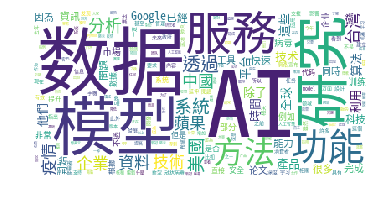

In [49]:
article_words(result)